In [2]:
# 각 클래스의 비율을 정하여 뽑힐 확률에 대한 가중치를 산정한다.
import torch
from torch.utils.data import DataLoader
import torchvision
import numpy as np
import torchvision.transforms as tr 

def make_weights(labels, nclasses):
    labels = np.array(labels)
    weight_list = []
    for cls in range(nclasses):
        idx = np.where(labels == cls)[0]
        count = len(idx)
        weight = 1 / count
        weights = [weight] * count
        weight_list += weights
    return weight_list

In [ ]:
# torchvision.datasets.ImageFolder를 사용할 경우 라벨이 정렬이 되어 데이터가 만들어 집니다. 
# 따라서 라벨을 기준으로 순차적으로 가중치를 할당하면 됩니다. 
# 만약 클래스가 순차적으로 정렬되어 있지 않은 데이터인 경우 인덱싱이 매칭되지 않아 아래 코드를 사용하셔야 합니다.

def make_weights(labels, nclasses):
    labels = np.array(labels) # where, unique 함수를 사용하기 위해 numpy로 변환한다.
    weight_arr = np.zeros_like(labels) # 가중치를 저장하는 배열을 생성한다.
    _, counts = np.unique(labels, return_counts=True) # 각 클래스의 데이터 개수를 센다.
    for cls in range(nclasses):
        weight_arr = np.where(labels == cls, 1/counts[cls], weight_arr) 
    return weight_arr

# 각 클래스의의 인덱스를 산출하여 해당 클래스 개수의 역수를 확률로 할당한다.
# 이를 통해 각 클래스의 전체 가중치를 동일하게 한다.

In [ ]:
transf = tr.Compose([tr.Resize((16,16)),tr.ToTensor()]) 
trainset = torchvision.datasets.ImageFolder(root='./class', transform=transf) # 데이터 세트 불러오기

weights = make_weights(trainset.targets, len(trainset.classes)) # 가중치 계산
weights = torch.DoubleTensor(weights) # 텐서 변환
print(weights)
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights)) # 샘플링 방법 정의

trainloader_wrs = DataLoader(trainset, batch_size=6, sampler=sampler) # 데이터 로더 정의
trainloader_rs = DataLoader(trainset, batch_size=6, shuffle=True)

In [ ]:
for epoch in range(3):
    for data in trainloader_wrs:
        print(data[1])

In [ ]:
for epoch in range(5):
    for data in trainloader_rs:
        print(data[1])

## Weighted Loss Function

In [8]:
import torch.nn as nn
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_ins = [40,45,30,62,70,153,395,46,75,194]
weights = [1-(x/sum(num_ins)) for x in num_ins]
class_weights = torch.FloatTensor(weights).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [9]:
weights

[0.963963963963964,
 0.9594594594594594,
 0.972972972972973,
 0.9441441441441442,
 0.9369369369369369,
 0.8621621621621621,
 0.6441441441441442,
 0.9585585585585585,
 0.9324324324324325,
 0.8252252252252252]

In [10]:
class_weights

tensor([0.9640, 0.9595, 0.9730, 0.9441, 0.9369, 0.8622, 0.6441, 0.9586, 0.9324,
        0.8252], device='cuda:0')

In [11]:
criterion

CrossEntropyLoss()

## Confusion Matrix

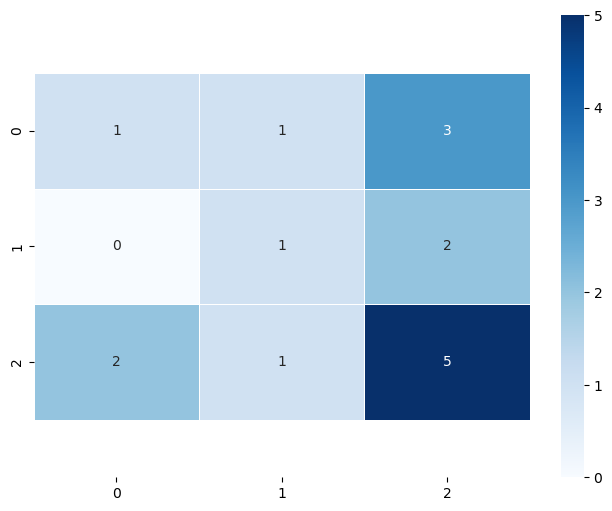

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

actual = [1,1,1,0,0,0,0,0,2,2,2,2,2,2,2,2]
prediction = [1,2,2,0,2,2,1,2,0,1,0,2,2,2,2,2]
c_mat = confusion_matrix(actual, prediction) # 실제 라벨, 예측값
plt.figure(figsize = (8,6))
sns.heatmap(c_mat, annot=True, fmt="d", cmap='Blues',linewidths=.5)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.savefig('confusion_matrix.png')
plt.show()

In [7]:
c_mat

array([[1, 1, 3],
       [0, 1, 2],
       [2, 1, 5]], dtype=int64)